<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/APRENDIZAJE_NO_SUPERVISADO_PARTE_3/blob/main/Semana_8_Con_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn --quiet
!pip install mlxtend --quiet

import umap.umap_ as umap
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
import pandas as pd

# Cargar el dataset (cambia la ruta según tu archivo)
df = pd.read_csv("/content/Life Expectancy Data.csv")

# Vista rápida
print("Shape del dataset:", df.shape)
display(df.head())

# Información general
print(df.info())
display(df.describe())


Shape del dataset: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# -------------------------------
# 1) Verificar valores faltantes
# -------------------------------
nan_counts = df.isna().sum()
print("Cantidad de valores faltantes por columna:")
display(nan_counts)

# Opcional: porcentaje de NaN
nan_percent = (nan_counts / len(df) * 100).round(2)
print("Porcentaje de valores faltantes por columna:")
display(nan_percent)




Cantidad de valores faltantes por columna:


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


Porcentaje de valores faltantes por columna:


,0
Country,0.00
Year,0.00
Status,0.00
Life expectancy,0.34
Adult Mortality,0.34
infant deaths,0.00
Alcohol,6.60
percentage expenditure,0.00
Hepatitis B,18.82
Measles,0.00


In [ ]:
# ------------------------------------
# 2) Imputación simple (mediana)
# ------------------------------------
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Verificación posterior
print("¿Quedan valores faltantes después de la imputación?")
display(df[num_cols].isna().sum())




¿Quedan valores faltantes después de la imputación?


,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creamos una copia del dataframe original
df_new = df.copy()

# ----------------------------------------
# 1) Codificar la columna Status
# ----------------------------------------
le = LabelEncoder()
df_new['Status_encoded'] = le.fit_transform(df_new['Status'])
# Developed = 1, Developing = 0

# ----------------------------------------
# 2) Crear rangos de edades (Age_group)
# ----------------------------------------
df_new['Age_group'] = pd.cut(df_new['Life expectancy '],
                             bins=[0, 60, 75, 120],
                             labels=['Young', 'Adults', 'Older adults'])

# ----------------------------------------
# 3) Codificar Age_group para ML si se desea
# ----------------------------------------
df_new['Age_group_encoded'] = le.fit_transform(df_new['Age_group'])

# ----------------------------------------
# 4) Mostrar las primeras filas del nuevo DataFrame
# ----------------------------------------
display(df_new[['Country', 'Year', 'Life expectancy ', 'Status', 'Status_encoded', 'Age_group', 'Age_group_encoded']].head())
df_new

,Country,Year,Life expectancy,Status,Status_encoded,Age_group,Age_group_encoded
0,Afghanistan,2015,65.0,Developing,1,Adults,0
1,Afghanistan,2014,59.9,Developing,1,Young,2
2,Afghanistan,2013,59.9,Developing,1,Young,2
3,Afghanistan,2012,59.5,Developing,1,Young,2
4,Afghanistan,2011,59.2,Developing,1,Young,2


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_encoded,Age_group,Age_group_encoded
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,Adults,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,Young,2
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,Young,2
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,Young,2
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,Young,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1,Young,2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1,Young,2
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1,Young,2
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1,Young,2


In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer

# -------------------------------
# Seleccionar únicamente columnas numéricas
# -------------------------------
num_cols = df_new.select_dtypes(include='number').columns.tolist()

# Excluir la columna target 'Life expectancy ' si quieres usarla más tarde como y
num_cols = [col for col in num_cols if col != 'Life expectancy ']

X_num = df_new[num_cols]

# -------------------------------
# Normalización por fila
# -------------------------------
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X_num)

# -------------------------------
# Convertir a DataFrame para visualización
# -------------------------------
X_normalized_df = pd.DataFrame(X_normalized, columns=num_cols)

# -------------------------------
# Mostrar primeras filas
# -------------------------------

print("\nPrimeras filas - Normalización por fila:")
display(X_normalized_df.head())



Primeras filas - Normalización por fila:


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_encoded,Age_group_encoded
0,0.000060,0.000008,0.000002,2.964149e-10,0.000002,0.000002,0.000034,5.661525e-07,0.000002,1.778489e-07,...,0.000002,2.964149e-09,0.000017,1.000000,5.098337e-07,5.127978e-07,1.419827e-08,2.993791e-07,2.964149e-08,0.000000e+00
1,0.006148,0.000827,0.000195,3.052603e-08,0.000224,0.000189,0.001502,5.677841e-05,0.000263,1.770510e-04,...,0.000189,3.052603e-07,0.001870,0.999978,5.342055e-05,5.342055e-05,1.453039e-06,3.052603e-05,3.052603e-06,6.105206e-06
2,0.000063,0.000008,0.000002,3.151424e-10,0.000002,0.000002,0.000014,5.704077e-07,0.000003,1.953883e-06,...,0.000002,3.151424e-09,0.000020,1.000000,5.578020e-07,5.578020e-07,1.481169e-08,3.119910e-07,3.151424e-08,6.302848e-08
3,0.000544,0.000074,0.000019,2.704925e-09,0.000021,0.000018,0.000754,4.760669e-06,0.000025,1.812300e-05,...,0.000018,2.704925e-08,0.000181,1.000000,4.841816e-06,4.868866e-06,1.252380e-07,2.650827e-06,2.704925e-07,5.409851e-07
4,0.000675,0.000092,0.000024,3.357281e-09,0.000002,0.000023,0.001012,5.774523e-06,0.000033,2.282951e-05,...,0.000023,3.357281e-08,0.000021,0.999999,6.110251e-06,6.110251e-06,1.524205e-07,3.189417e-06,3.357281e-07,6.714561e-07


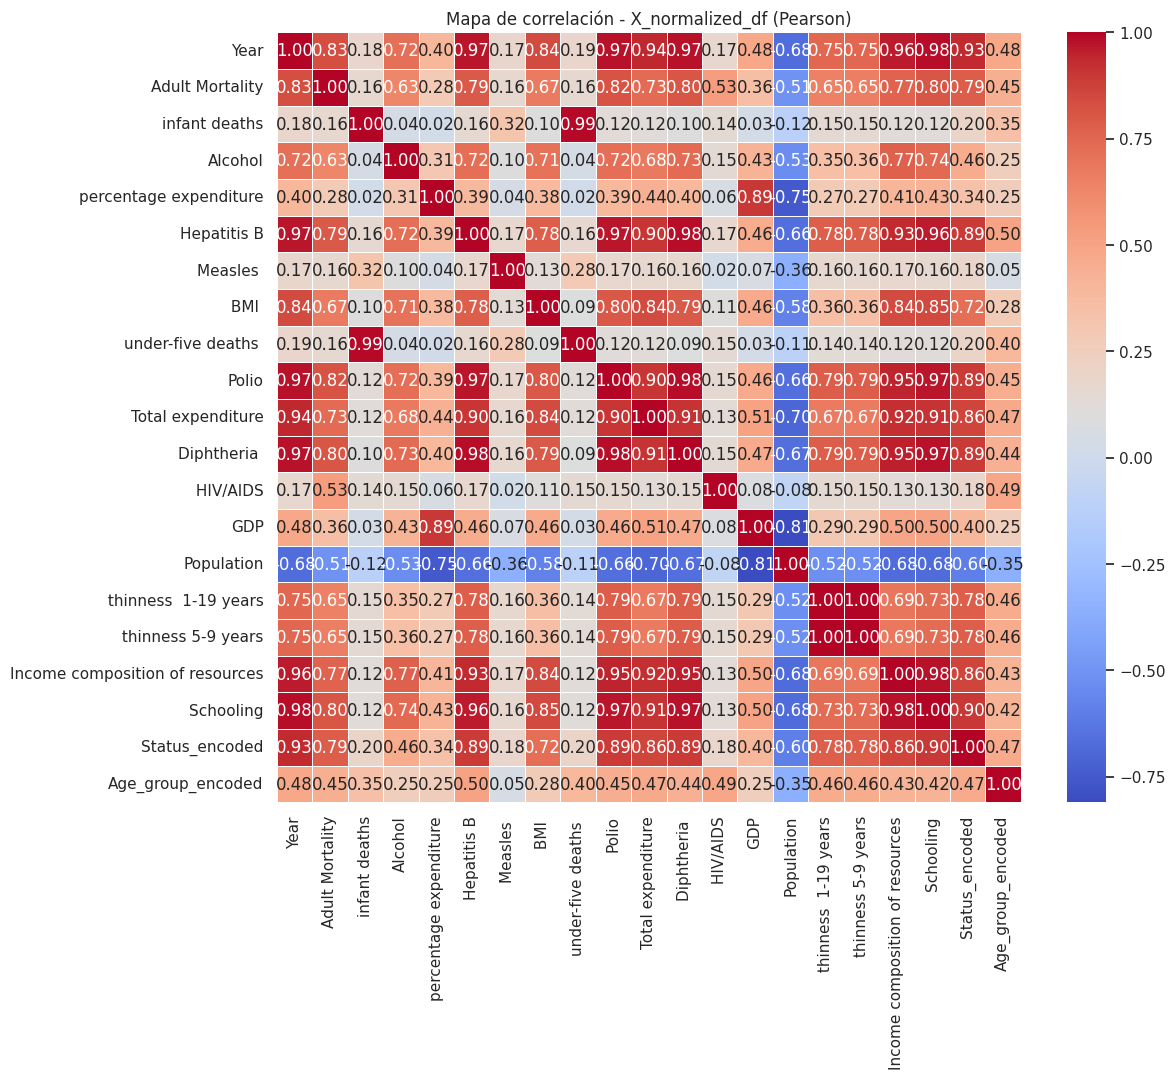

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1) Calcular la matriz de correlación (Pearson)
# -------------------------------
correlation_matrix = X_normalized_df.corr(method='pearson')

# -------------------------------
# 2) Visualizar la matriz con un heatmap
# -------------------------------
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de correlación - X_normalized_df (Pearson)")
plt.show()


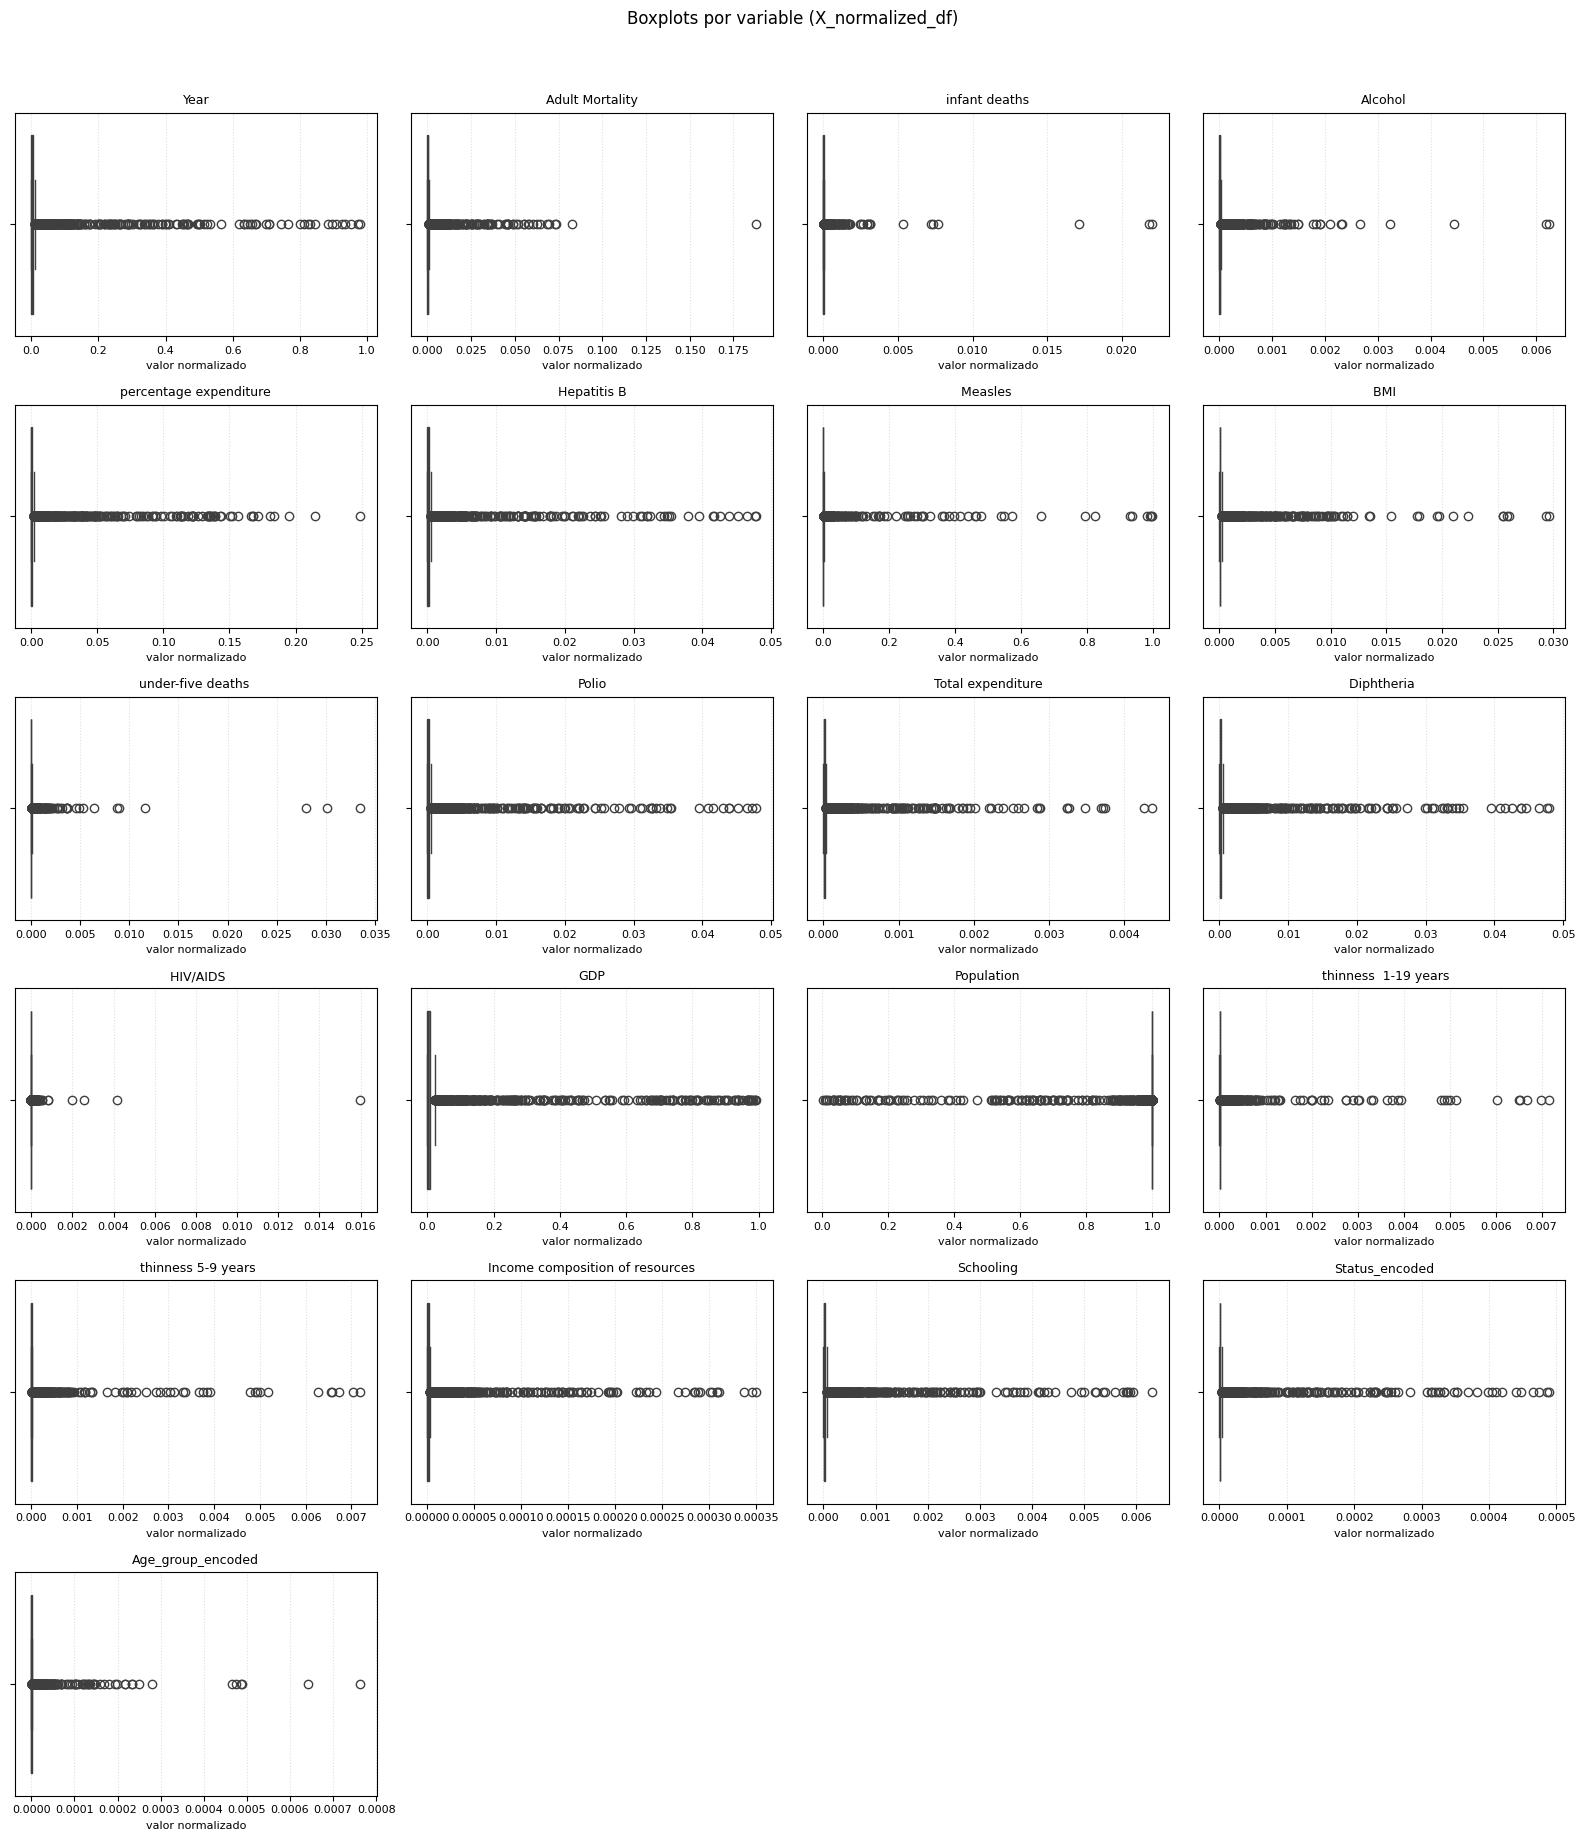

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns


desired_cols = [
    'Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling',
    'Status_encoded', 'Age_group_encoded'
]

# Mantener solo las que existan en X_normalized_df
existing_cols = [c for c in desired_cols if c in X_normalized_df.columns]
missing = [c for c in desired_cols if c not in X_normalized_df.columns]
if missing:
    print("⚠️ Columnas no encontradas en X_normalized_df:", missing)

# Grid de subplots
n = len(existing_cols)
ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
axes = axes.flatten()

for ax, col in zip(axes, existing_cols):
    sns.boxplot(x=X_normalized_df[col], ax=ax, showfliers=True)
    ax.set_title(col, fontsize=9)
    ax.set_xlabel("valor normalizado", fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.grid(True, axis='x', linestyle=':', alpha=0.4)

# Ocultar ejes vacíos si sobran
for j in range(len(existing_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Boxplots por variable (X_normalized_df)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

summary = []
for col in existing_cols:
    s = X_normalized_df[col].dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    n_out = ((s < low) | (s > high)).sum()
    summary.append([col, int(n_out), float(low), float(high)])

outliers_summary = pd.DataFrame(summary, columns=["columna","n_outliers","lim_inf","lim_sup"]).sort_values("n_outliers", ascending=False)
display(outliers_summary)


,columna,n_outliers,lim_inf,lim_sup
14,Population,609,0.999690,1.000185
6,Measles,550,-0.000317,0.000529
0,Year,546,-0.006095,0.011327
19,Status_encoded,535,-0.000002,0.000003
17,Income composition of resources,531,-0.000002,0.000003
11,Diphtheria,526,-0.000249,0.000453
9,Polio,525,-0.000257,0.000467
5,Hepatitis B,525,-0.000255,0.000464
10,Total expenditure,514,-0.000020,0.000036
18,Schooling,510,-0.000039,0.000071


In [1]:
import pandas as pd

def quitar_outliers_iqr(df, cols, factor=1.5):
    """
    Quita outliers de columnas numéricas usando el método IQR.

    Parámetros:
    df : DataFrame
    cols : lista de columnas a procesar
    factor : 1.5 (suave) o 3 (más permisivo)
    """
    df_limpio = df.copy()

    for c in cols:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - factor * IQR
        lim_sup = Q3 + factor * IQR

        # Reemplazamos outliers por los límites
        df_limpio[c] = df[c].clip(lim_inf, lim_sup)

        print(f"Columna {c}: límites [{lim_inf:.2f}, {lim_sup:.2f}]")

    return df_limpio


In [ ]:
# Qué hace este código:

# Calcula Q1 (25%) y Q3 (75%).

# Define los límites con IQR = Q3 - Q1.

# Los valores fuera de esos límites se recortan al mínimo o máximo permitido.

# Devuelve un DataFrame limpio y te imprime los límites para cada variable.
cols_clave = ['GDP', 'Adult Mortality', ' BMI ']
df_sin_outliers = quitar_outliers_iqr(X_normalized_df, cols=cols_clave, factor=1.5)


Columna GDP: límites [-0.01, 0.02]
Columna Adult Mortality: límites [-0.00, 0.00]
Columna  BMI : límites [-0.00, 0.00]


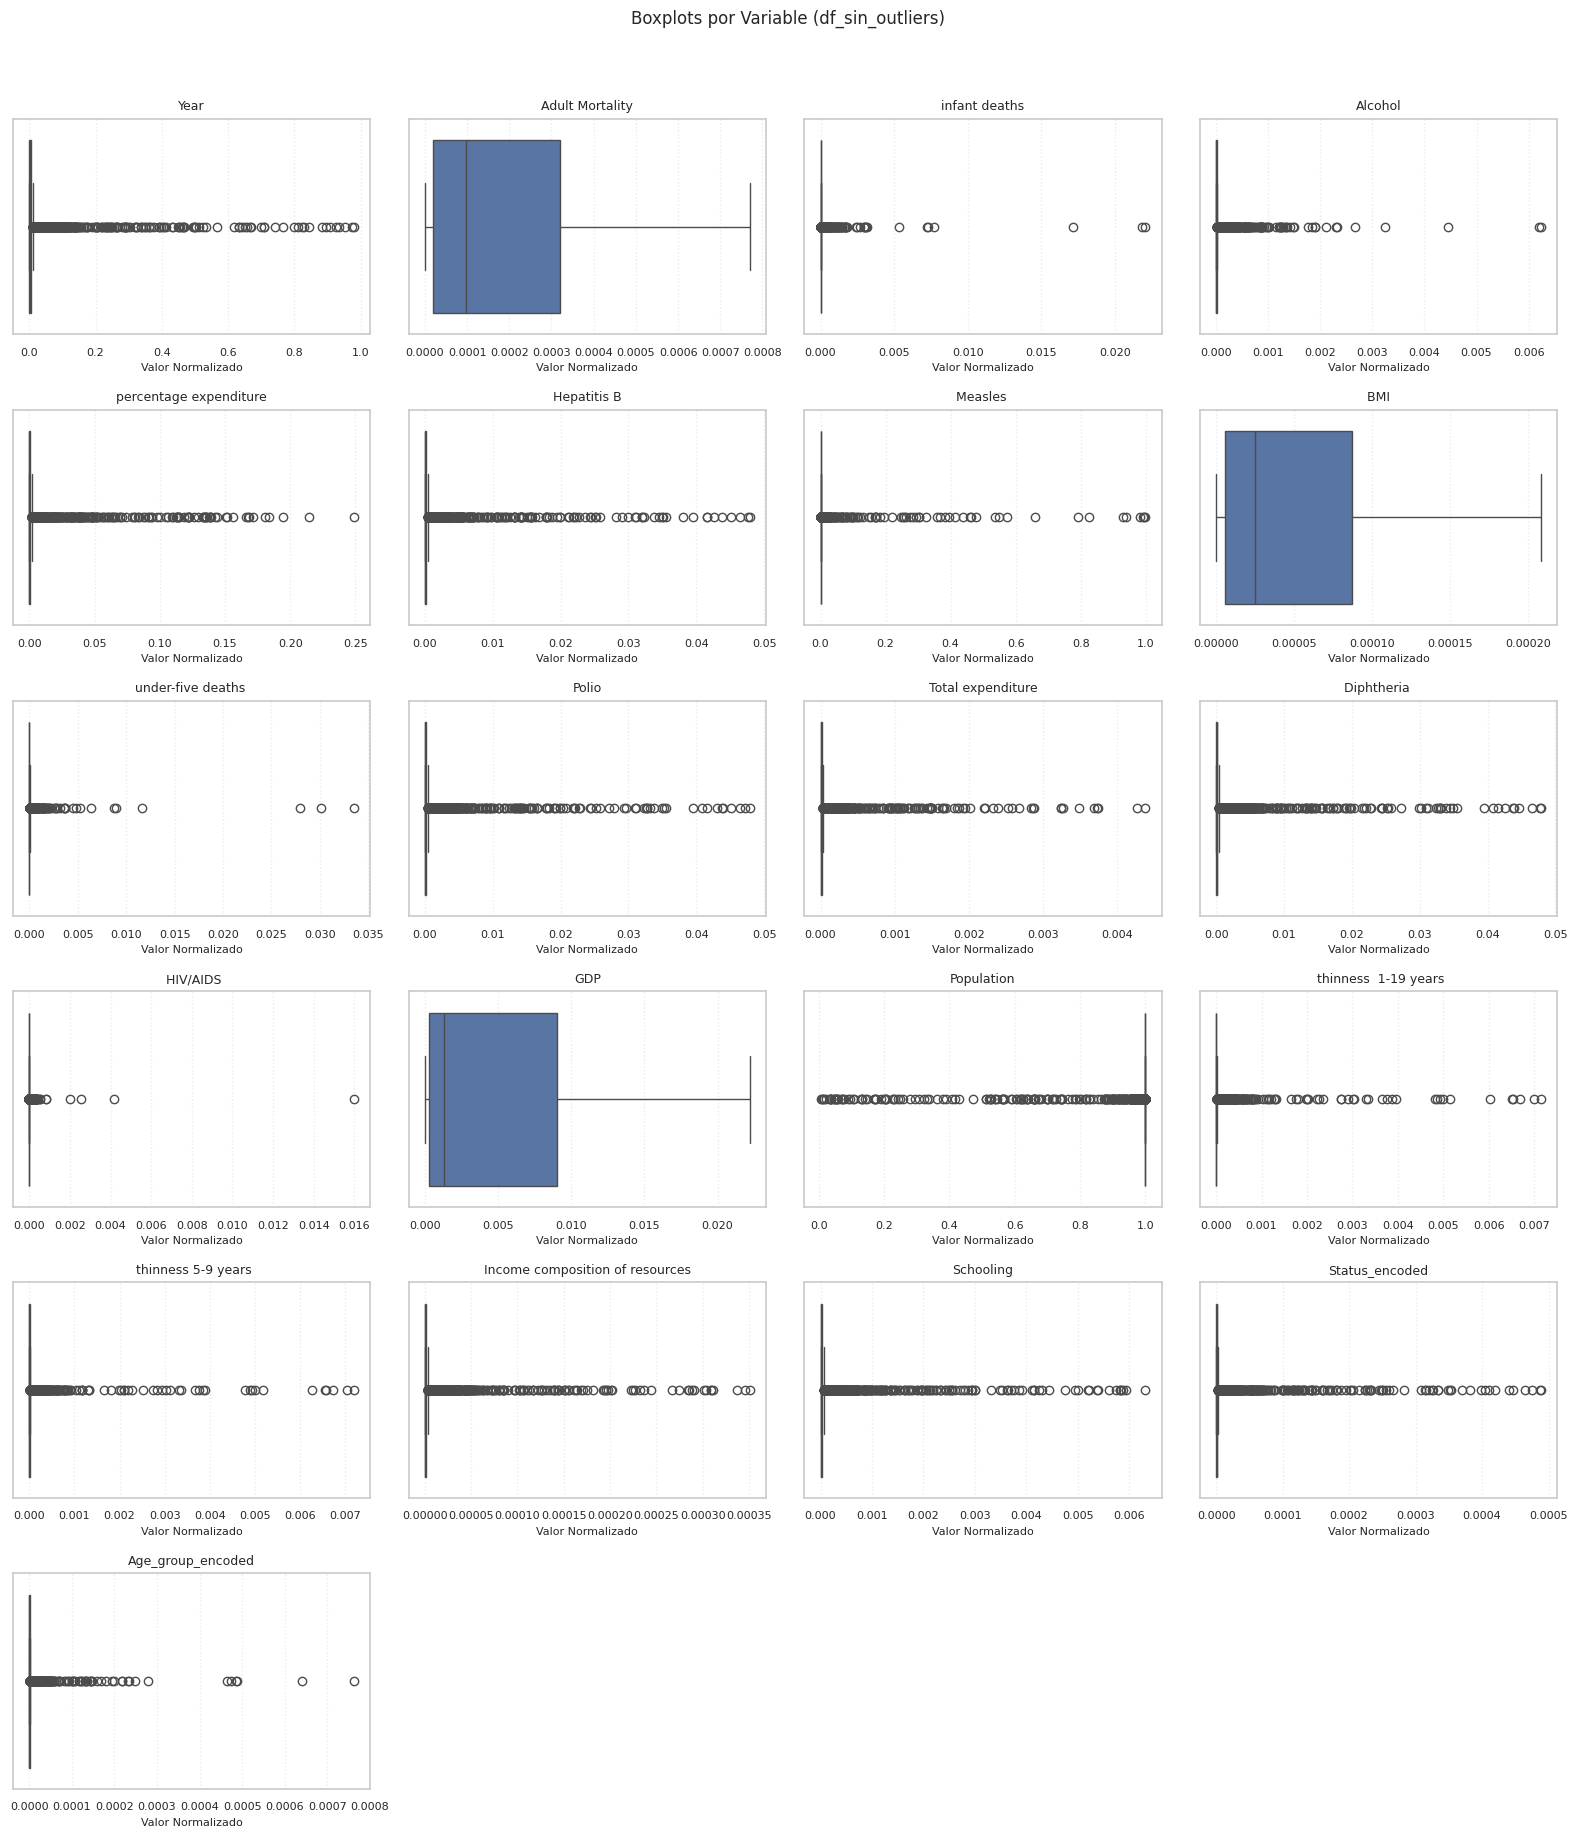

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de columnas numéricas (sin outliers)
existing_cols = df_sin_outliers.select_dtypes(include='number').columns.tolist()

# Grid de subplots
n = len(existing_cols)
ncols = 4
nrows = math.ceil(n / ncols)

# Creación de la figura y los subgráficos
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
axes = axes.flatten()

# Graficar cada columna
for ax, col in zip(axes, existing_cols):
    sns.boxplot(x=df_sin_outliers[col], ax=ax, showfliers=True)
    ax.set_title(col, fontsize=9)
    ax.set_xlabel("Valor Normalizado", fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.grid(True, axis='x', linestyle=':', alpha=0.4)

# Ocultar ejes vacíos si sobran
for j in range(len(existing_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Boxplots por Variable (df_sin_outliers)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()


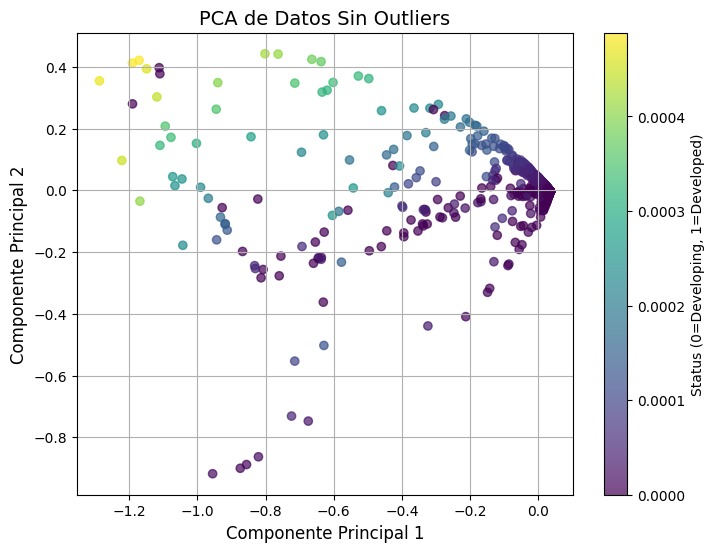

Varianza explicada por PCA: [0.75250415 0.14225167]


In [ ]:
from sklearn.decomposition import PCA

# -------------------------------
# 1) Seleccionar columnas numéricas (sin outliers)
# -------------------------------
X_sin_outliers = df_sin_outliers.select_dtypes(include='number')

# -------------------------------
# 3) Aplicar PCA (2 componentes)
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sin_outliers)

# -------------------------------
# 4) Graficar los resultados de PCA
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=df_sin_outliers['Status_encoded'], cmap='viridis')
plt.title('PCA de Datos Sin Outliers', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.colorbar(label='Status (0=Developing, 1=Developed)')
plt.grid(True)
plt.show()

# -------------------------------
# 5) Mostrar varianza explicada por los componentes
# -------------------------------
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PCA: {explained_variance}")


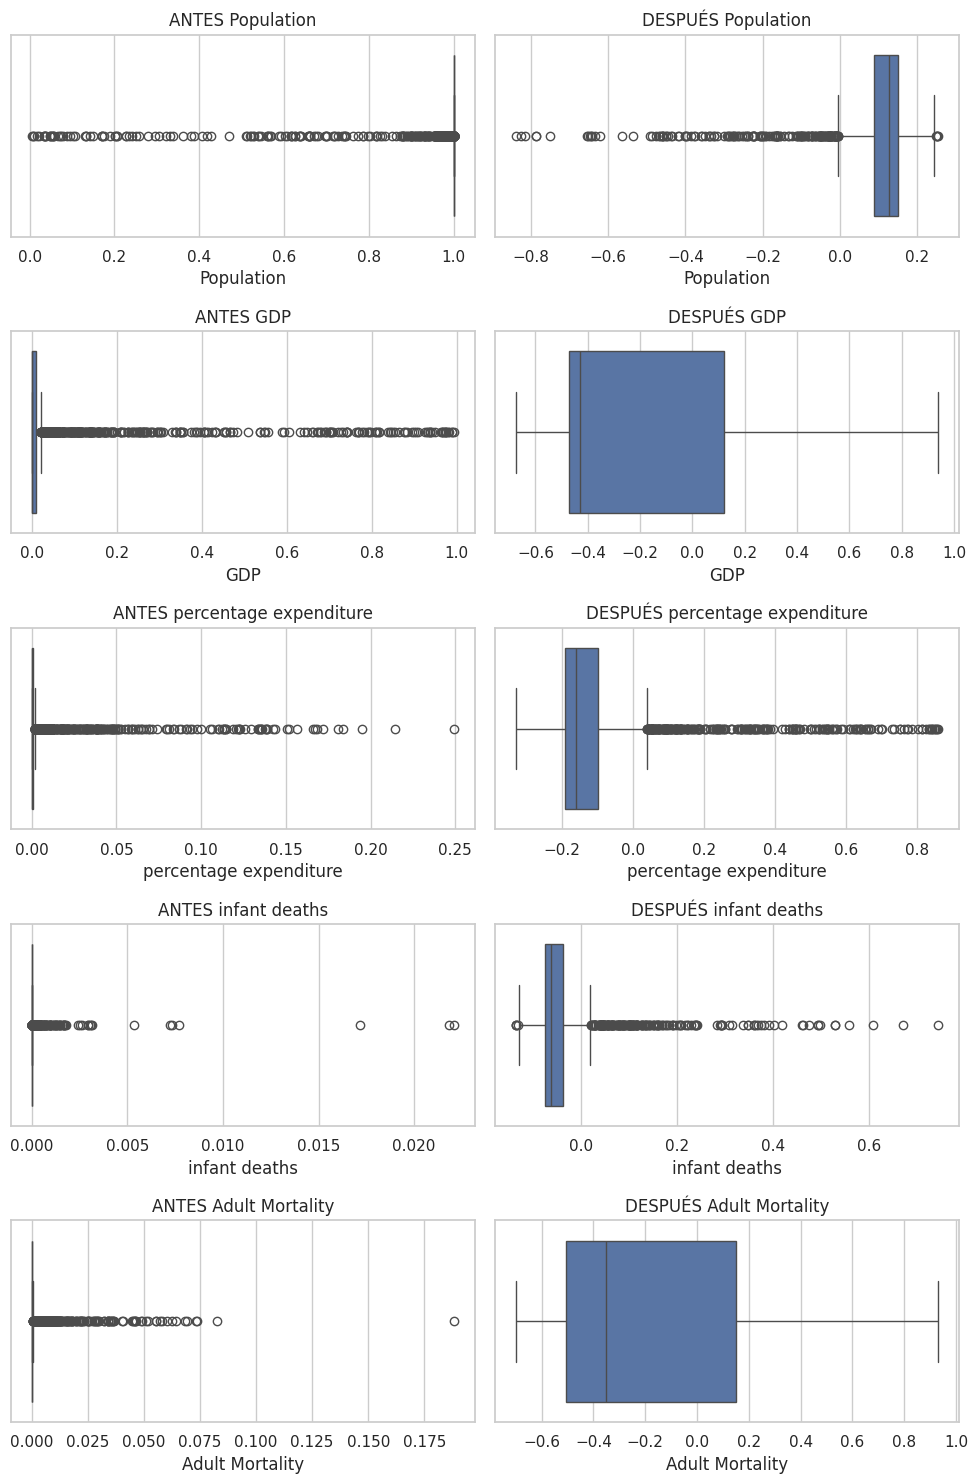

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer

# Limpiar nombres
df_log = df_sin_outliers.copy()
df_log.columns = df_log.columns.str.strip()

# Columnas a transformar con log1p
cols_to_log = ['Population','Population', 'GDP', 'percentage expenditure', 'Measles', 'infant deaths', 'under-five deaths', 'Adult Mortality']
cols_to_log = [c for c in cols_to_log if c in df_log.columns]

# Aplicar log1p
for c in cols_to_log:
    shift = max(0, -df_log[c].min() + 1e-6)  # Asegurando que el valor sea > 0
    df_log[c] = np.log1p(df_log[c] + shift)

# Normalización y estandarización
X_num = df_log.select_dtypes(include='number').drop(columns='Life expectancy', errors='ignore')
X_scaled = StandardScaler().fit_transform(X_num)
X_normalized_log = Normalizer().fit_transform(X_scaled)

# Crear DataFrame normalizado
X_normalized_df_log = pd.DataFrame(X_normalized_log, columns=X_num.columns)

# Boxplots comparativos
subset = [col for col in ['Population', 'GDP', 'percentage expenditure', 'Measles', 'infant deaths', 'under-five deaths', 'Adult Mortality'] if col in X_normalized_df.columns and col in X_normalized_df_log.columns]
if subset:
    fig, axes = plt.subplots(len(subset), 2, figsize=(10, 3 * len(subset)))
    for i, col in enumerate(subset):
        sns.boxplot(x=X_normalized_df[col], ax=axes[i, 0])
        axes[i, 0].set_title(f"ANTES {col}")
        sns.boxplot(x=X_normalized_df_log[col], ax=axes[i, 1])
        axes[i, 1].set_title(f"DESPUÉS {col}")
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas comunes para comparar.")


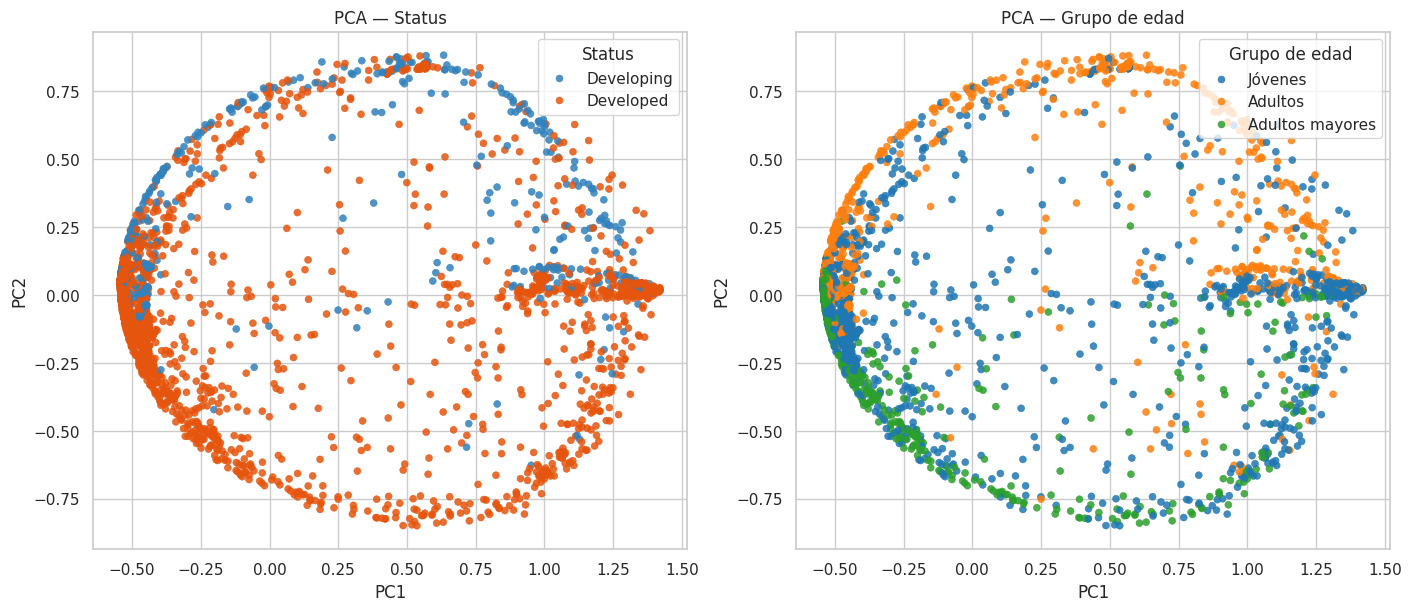

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# -------------------------------
# 0) Preparación de datos
# -------------------------------
X_norm = X_normalized_df_log.fillna(0.0)  # aseguramos no tener NaN

status_map = {0: "Developing", 1: "Developed"}
age_map = {0: "Jóvenes", 1: "Adultos", 2: "Adultos mayores"}

df_new = df_new.copy()
df_new.columns = df_new.columns.str.strip()

# -------------------------------
# 1) PCA
# -------------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_norm.values)
X_pca2 = pca.fit_transform(X_norm.values)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Status_name"] = df_new["Status_encoded"].map(status_map)
pca_df["Age_group_name"] = df_new["Age_group_encoded"].map(age_map)

# -------------------------------
# 2) Gráficos lado a lado
# -------------------------------
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# (a) PCA por Status
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2",
    hue="Status_name",
    hue_order=["Developing", "Developed"],
    palette={"Developing": "#3182bd", "Developed": "#e6550d"},
    s=25, alpha=0.85, ax=axes[0], edgecolor=None
)
axes[0].set_title("PCA — Status")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Status", loc="upper right")

# (b) PCA por Age group
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2",
    hue="Age_group_name",
    hue_order=["Jóvenes", "Adultos", "Adultos mayores"],
    palette=sns.color_palette("tab10", 3),
    s=25, alpha=0.85, ax=axes[1], edgecolor=None
)
axes[1].set_title("PCA — Grupo de edad")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].legend(title="Grupo de edad", loc="upper right")

plt.show()


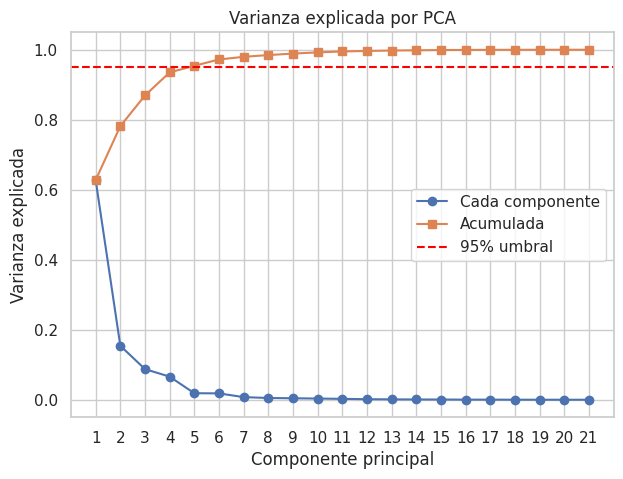

In [ ]:
# ============================================
# 2) PCA y varianza explicada
# ============================================
from sklearn.decomposition import PCA
import numpy as np

# PCA con tantas componentes como variables
pca = PCA(n_components=len(X_norm.columns))
X_pca = pca.fit_transform(X_norm)

# Varianza explicada por componente
evr = pca.explained_variance_ratio_  # explained_variance_ratio_ nos dice cuánta varianza captura cada componente
cum_evr = np.cumsum(evr)  # Acumulamos la varianza explicada para ver el porcentaje total

# Gráfico
plt.figure(figsize=(7,5))
plt.plot(range(1, len(evr)+1), evr, marker='o', label="Cada componente")
plt.plot(range(1, len(cum_evr)+1), cum_evr, marker='s', label="Acumulada")
plt.axhline(0.95, color="red", linestyle="--", label="95% umbral")
plt.xticks(range(1, len(evr)+1))
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada")
plt.title("Varianza explicada por PCA")
plt.legend()
plt.show()


In [ ]:
# ============================================
# 4) Loadings de las variables
# ============================================

# Obtener los nombres de las características desde X_norm (ya normalizado)
feature_names = X_normalized_df.columns

# Calcular los loadings de las variables
loadings = pd.DataFrame(
    pca.components_.T,  # Componente de PCA (filas son variables, columnas son componentes)
    columns=[f"PC{i+1}" for i in range(pca.components_.shape[0])],  # Nombres dinámicos según el número de componentes
    index=feature_names  # Nombres de las variables
)

# Mostrar los loadings redondeados
display(loadings.round(3))


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Year,0.142,-0.002,-0.270,0.022,-0.018,-0.160,-0.037,-0.019,-0.077,0.048,...,0.055,0.069,0.021,0.194,0.047,0.332,-0.007,0.815,-0.164,-0.014
Adult Mortality,0.496,-0.684,0.212,-0.487,-0.054,0.022,-0.038,0.003,0.002,-0.006,...,-0.005,0.002,0.002,-0.006,0.001,-0.000,0.000,-0.001,0.000,0.000
infant deaths,0.044,-0.030,-0.083,-0.014,0.319,0.048,0.403,-0.292,-0.364,-0.143,...,0.010,0.003,-0.002,-0.060,0.021,0.012,0.052,-0.144,-0.668,0.070
Alcohol,0.105,0.014,-0.196,0.016,-0.085,-0.004,-0.069,0.440,-0.241,-0.241,...,0.127,0.092,-0.065,0.395,0.056,-0.110,-0.007,-0.041,-0.005,0.004
percentage expenditure,0.153,0.103,-0.246,-0.031,-0.362,0.750,0.027,-0.151,-0.149,0.403,...,0.021,-0.004,-0.008,0.010,-0.009,-0.017,-0.003,0.004,-0.002,-0.000
Hepatitis B,0.131,-0.001,-0.253,0.020,-0.019,-0.147,-0.030,0.021,-0.022,0.031,...,-0.068,-0.414,-0.323,-0.069,-0.692,0.015,-0.354,-0.050,-0.033,-0.001
Measles,0.059,-0.017,-0.149,-0.024,0.797,0.325,-0.409,0.185,0.103,0.140,...,-0.013,-0.009,0.001,0.012,0.003,-0.001,0.002,0.005,0.007,-0.000
BMI,0.543,-0.064,0.307,0.777,0.023,0.048,-0.003,-0.019,0.014,-0.014,...,-0.003,-0.001,0.002,0.000,-0.000,0.000,0.001,-0.001,0.001,-0.000
under-five deaths,0.041,-0.031,-0.078,-0.014,0.300,0.047,0.421,-0.260,-0.331,-0.129,...,0.003,0.008,-0.008,0.001,-0.020,0.000,-0.049,0.125,0.705,-0.078
Polio,0.132,0.002,-0.257,0.021,-0.029,-0.143,-0.049,-0.007,-0.029,0.038,...,-0.064,-0.352,-0.159,-0.176,0.701,-0.023,-0.451,-0.100,0.017,-0.003


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


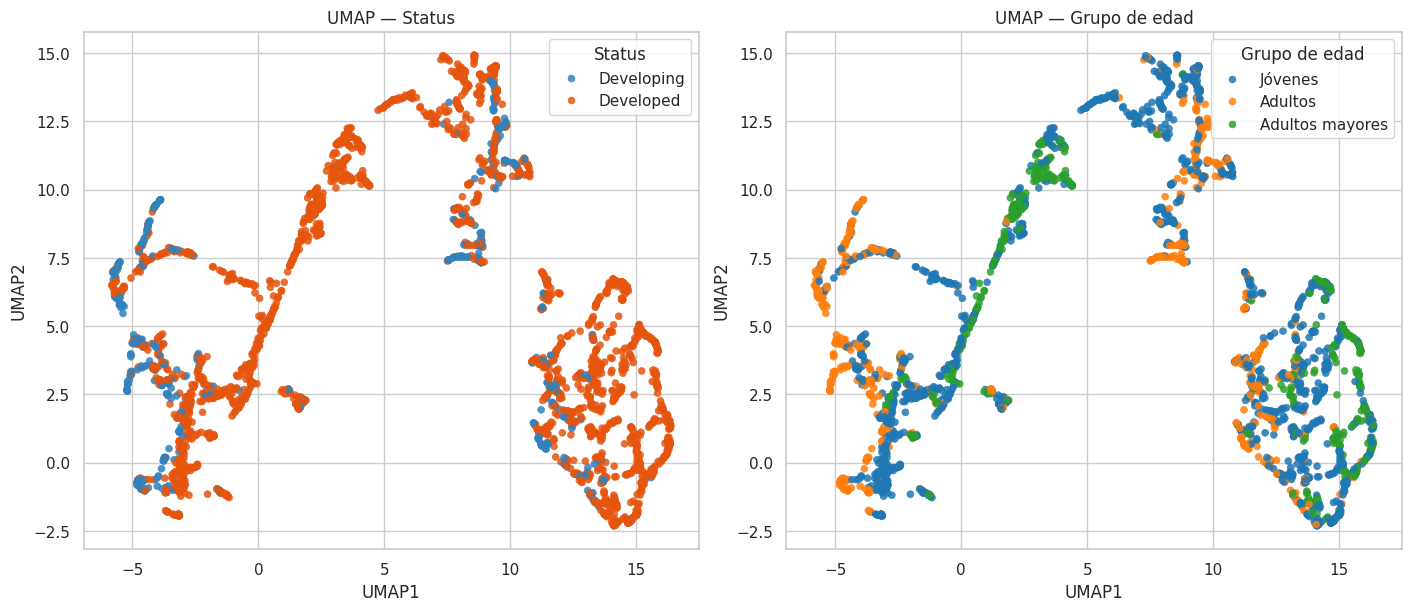

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

# -------------------------------
# 0) Preparación de datos
# -------------------------------
X_umap_src = X_normalized_df_log.fillna(0.0)  # matriz numérica ya log-normalizada

status_map = {0: "Developing", 1: "Developed"}
age_map = {0: "Jóvenes", 1: "Adultos", 2: "Adultos mayores"}

df_new = df_new.copy()
df_new.columns = df_new.columns.str.strip()

# -------------------------------
# 1) Embedding UMAP (2D)
# -------------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_umap_src.values)

umap_df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
umap_df["Status_name"] = df_new["Status_encoded"].map(status_map)
umap_df["Age_group_name"] = df_new["Age_group_encoded"].map(age_map)

# -------------------------------
# 2) Gráficos lado a lado
# -------------------------------
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# (a) UMAP por Status
sns.scatterplot(
    data=umap_df, x="UMAP1", y="UMAP2",
    hue="Status_name",
    hue_order=["Developing", "Developed"],
    palette={"Developing": "#3182bd", "Developed": "#e6550d"},
    s=25, alpha=0.85, ax=axes[0], edgecolor=None
)
axes[0].set_title("UMAP — Status")
axes[0].set_xlabel("UMAP1")
axes[0].set_ylabel("UMAP2")
axes[0].legend(title="Status", loc="upper right")

# (b) UMAP por Grupo de edad
sns.scatterplot(
    data=umap_df, x="UMAP1", y="UMAP2",
    hue="Age_group_name",
    hue_order=["Jóvenes", "Adultos", "Adultos mayores"],
    palette=sns.color_palette("tab10", 3),
    s=25, alpha=0.85, ax=axes[1], edgecolor=None
)
axes[1].set_title("UMAP — Grupo de edad")
axes[1].set_xlabel("UMAP1")
axes[1].set_ylabel("UMAP2")
axes[1].legend(title="Grupo de edad", loc="upper right")

plt.show()


In [ ]:
# ============================================
# Clustering de países con PCA + K-means
# ============================================
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------
# 1) Definir X e identificadores
# ---------------------------
X = X_normalized_df_log.copy()
paises = df_new['Country'].values  # nombre del país
estatus = df_new['Status'].values  # etiqueta original (Developed/Developing)

# ---------------------------
# 2) PCA a 5 dimensiones
# ---------------------------
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X)

reducer = umap.UMAP(n_components=5, random_state=42)
X_umap = reducer.fit_transform(X)
print("Varianza explicada por las 5 primeras PCs:", pca.explained_variance_ratio_.sum())

# ---------------------------
# 3) K-means con k=3 (ejemplo)
# ---------------------------
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels_km = kmeans.fit_predict(X_pca)
labels_km2 = kmeans.fit_predict(X)
labels_km3 = kmeans.fit_predict(X_umap)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Varianza explicada por las 5 primeras PCs: 0.9540529638478659


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


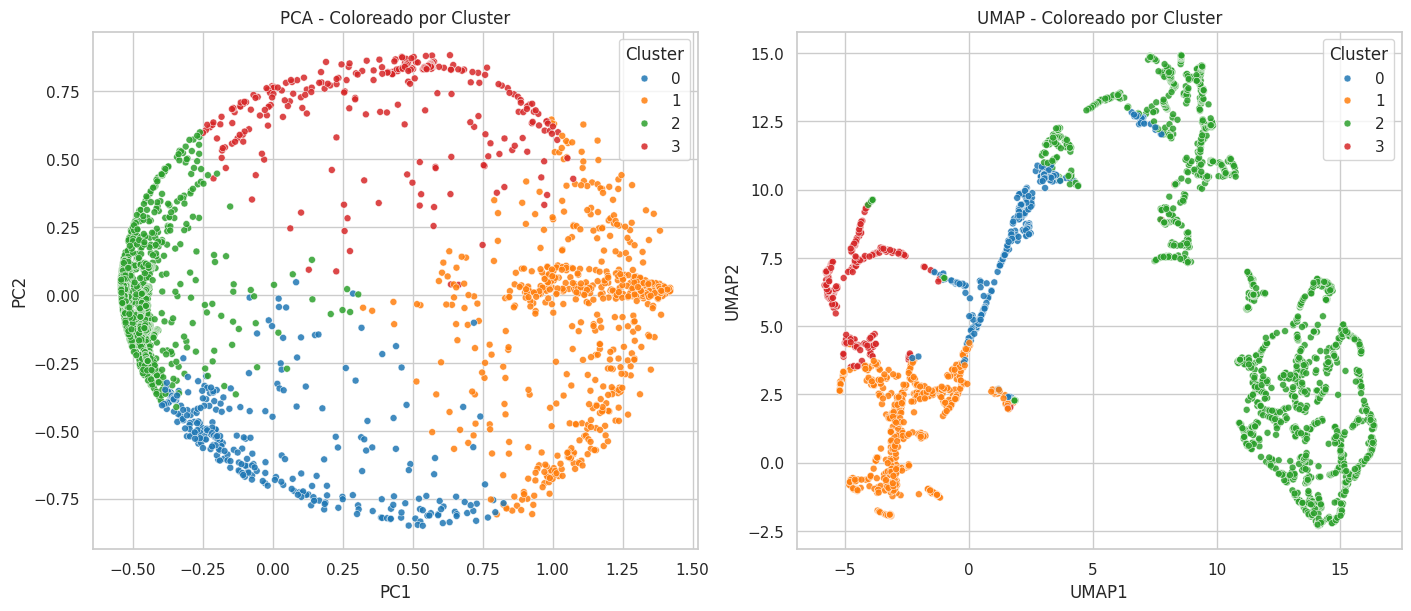

Status_name,Developed,Developing
Cluster,,
0,297,4
1,518,131
2,1451,263
3,160,114


,Life expectancy,GDP,Schooling,Adult Mortality,Alcohol,Total expenditure,HIV/AIDS,Polio,Hepatitis B
Cluster,,,,,,,,,
0,60.26,1203.52,10.12,303.71,2.79,5.52,4.10,72.99,82.06
1,70.79,6639.63,12.41,149.61,4.82,6.16,1.91,84.24,82.94
2,68.92,4040.65,11.76,159.79,4.49,5.87,1.51,82.19,82.36
3,77.37,28567.88,14.73,78.69,6.20,6.17,0.23,92.00,88.38



Top-10 países por esperanza de vida — Cluster 0


,Country,Life expectancy
0,Luxembourg,79.700000
1,Uruguay,76.400000
2,Panama,75.500000
3,Lebanon,74.650000
4,Latvia,74.100000
5,Nicaragua,73.733333
6,Montenegro,73.533333
7,Thailand,72.750000
8,Cabo Verde,72.583333
9,Paraguay,72.466667



Top-10 países por esperanza de vida — Cluster 1


,Country,Life expectancy
0,Germany,89.000000
1,Switzerland,85.000000
2,Sweden,84.950000
3,Japan,82.580000
4,Iceland,82.323077
5,Portugal,81.880000
6,Australia,81.427273
7,Israel,81.300000
8,Belgium,80.720000
9,Luxembourg,80.700000



Top-10 países por esperanza de vida — Cluster 2


,Country,Life expectancy
0,Canada,83.050000
1,Australia,82.533333
2,Norway,82.500000
3,Italy,82.321429
4,France,82.293333
5,Spain,82.235714
6,Switzerland,82.100000
7,Austria,82.025000
8,Sweden,82.000000
9,Netherlands,81.654545



Top-10 países por esperanza de vida — Cluster 3


,Country,Life expectancy
0,Iceland,82.966667
1,Australia,82.850000
2,Sweden,82.800000
3,Italy,82.500000
4,Greece,82.400000
5,Switzerland,82.200000
6,Finland,82.014286
7,Japan,81.900000
8,Slovenia,81.800000
9,Singapore,81.707692


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

# -------------------------------
# 0) Preparación de Datos
# -------------------------------
df_vis = df_new.copy()  # Hacemos una copia para no modificar el original
df_vis.columns = df_vis.columns.str.strip()  # Limpiamos los nombres de las columnas

# Agregamos el cluster al DataFrame
df_vis['Cluster'] = labels_km

# Mapear el estatus a nombres legibles
status_map = {0: "Developing", 1: "Developed"}
df_vis['Status_name'] = df_vis['Status_encoded'].map(status_map)

# -------------------------------
# 1) PCA y UMAP por Cluster
# -------------------------------
# Normalizamos los datos para PCA y UMAP
X_plot = X_normalized_df_log.fillna(0.0).values

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_plot)

# UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_plot)

# Crear gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# (a) Gráfico PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_vis['Cluster'], palette="tab10", s=25, alpha=0.85, ax=axes[0])
axes[0].set_title("PCA - Coloreado por Cluster")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# (b) Gráfico UMAP
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_vis['Cluster'], palette="tab10", s=25, alpha=0.85, ax=axes[1])
axes[1].set_title("UMAP - Coloreado por Cluster")
axes[1].set_xlabel("UMAP1")
axes[1].set_ylabel("UMAP2")

plt.show()

# -------------------------------
# 2) Tabla de Contingencia: Cluster vs Status
# -------------------------------
contingency = pd.crosstab(df_vis['Cluster'], df_vis['Status_name'])
display(contingency)

# -------------------------------
# 3) Perfiles Promedio por Cluster
# -------------------------------
# Variables clave para análisis
vars_clave = [
    'Life expectancy', 'GDP', 'Schooling', 'Adult Mortality', 'Alcohol',
    'Total expenditure', 'HIV/AIDS', 'Polio', 'Hepatitis B'
]

# Filtrar variables que existen en el dataframe
vars_clave = [c for c in vars_clave if c in df_vis.columns]

# Calcular promedio por cluster
perfil = df_vis.groupby('Cluster')[vars_clave].mean().round(2)
display(perfil)

# -------------------------------
# 4) Países Representativos por Cluster
# -------------------------------
le_col = 'Life expectancy' if 'Life expectancy' in df_vis.columns else 'Life expectancy '

# Promediar por país y cluster
tmp = (df_vis.groupby(['Cluster', 'Country'])[le_col]
       .mean()
       .reset_index()
       .sort_values([ 'Cluster', le_col], ascending=[True, False]))

# Mostrar Top-10 países por esperanza de vida
for cl in sorted(df_vis['Cluster'].unique()):
    top10 = tmp[tmp['Cluster'] == cl].head(10)
    print(f"\nTop-10 países por esperanza de vida — Cluster {cl}")
    display(top10[['Country', le_col]].reset_index(drop=True))

